### Proyecto Individual Henry N°2
**1_EDA**

**Autor: Bioing. Urteaga Facundo Nahuel**

**Resumen:** Se realiza la carga de los datos de homicidios, tanto hechos como víctimas, y se realiza un análisis exploratorio en búsqueda de datos faltantes o duplicados, outliers, y una primera vista de la distribución de los datos para poder así inferir análisis posteriores

**Índice:**
1. **Carga de librerías**
2. **Lectura de archivos**
3. **EDA y limpieza del archivo de hechos**
4. **Visualización de datos de archivo de hechos**
5. **EDA y limpieza del archivo de víctimas**
6. **Visualización de datos de archivo de víctimas**
7. **Guardar archivos**

### 1. Carga de librerías

In [1]:
# 1. Carga de librerías

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

### 2. Lectura de archivos

In [2]:
# 2. Lectura de archivos

# Obtener directorios de datos
directorio_actual = os.getcwd()
ruta_hom_hech = os.path.join(directorio_actual, "Datos", "homicidios_hechos.csv")
ruta_hom_vic = os.path.join(directorio_actual, "Datos", "homicidios_victimas.csv")

# Lectura de los archivos .csv
hom_hech_df = pd.read_csv(ruta_hom_hech)
hom_vic_df = pd.read_csv(ruta_hom_vic)


In [3]:
# Exploro comportamiento de variables y presencia de outliers

# df_hom_hech["N_VICTIMAS"].value_counts() # OK
# df_hom_hech["AAAA"].value_counts() # OK
# df_hom_hech["MM"].value_counts() # OK
# df_hom_hech["DD"].max() # OK
# df_hom_hech["HORA"].max() # Se encuentra que existe un "SD" referente a sin datos.
# df_hom_hech["HH"].min() # Se encuentra que existe un "SD" referente a sin datos.
# df_hom_hech["TIPO_DE_CALLE"].value_counts() # OK
# df_hom_hech["COMUNA"].value_counts() # Hay dos con comuna 0
# df_hom_hech["PARTICIPANTES"].value_counts() # Hay muchos SD por tratar. El resto OK
# df_hom_hech["VICTIMA"].value_counts() # Hay uno por analizar que dice PEATON_MOTO
# df_hom_hech["ACUSADO"].value_counts() # OK

### 3. EDA y limpieza de hom_hech_df

In [4]:
# Explorar filas y columnas

print('Cantidad de Filas y columnas:',hom_hech_df.shape)
print('Nombre columnas:',hom_hech_df.columns)

Cantidad de Filas y columnas: (696, 21)
Nombre columnas: Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')


In [5]:
# Exploro datos faltantes

hom_hech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [6]:
# Mostrar el número de valores faltantes por columna
print(hom_hech_df.isnull().sum())

# Conclusiones del análisis:

# Hay una calle sin datos debido a que lugar del hecho tiene "sd"
# En general altura y cruce estan intercalados (si no hay altura, quiere decir que fue en un cruce)
# En general donde falta altura o cruce es en las AUTOPISTAS

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


In [7]:
# Verificar si hay duplicados en el DataFrame
duplicados = hom_hech_df.duplicated()

# Contar el número de registros duplicados
print(f"Número de registros duplicados: {duplicados.sum()}")


Número de registros duplicados: 0


In [8]:
# Convertir las columnas FECHA y HORA a formato datetime especificando el formato correcto

hom_hech_df['FECHA'] = pd.to_datetime(hom_hech_df['FECHA'], format='%m/%d/%Y', errors='coerce')

print(hom_hech_df['FECHA'].isna().sum())

0


In [9]:
print(hom_hech_df.loc[4, 'FECHA'].day)

21


In [10]:
# Convertir la columna HORA a formato de tiempo
hom_hech_df['HORA'] = pd.to_datetime(hom_hech_df['HORA'], format='%H:%M:%S', errors='coerce').dt.time

print(hom_hech_df['HORA'].isna().sum())

1


In [11]:
print(hom_hech_df.loc[4, 'HORA'].hour)

5


In [12]:
# Filtrar las filas donde 'Altura' y 'Calle' están vacías
filas_vacias = hom_hech_df[hom_hech_df['Altura'].isna() & hom_hech_df['Cruce'].isna()]
print(filas_vacias)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
35   2016-0049           1 2016-04-17  2016   4  17  00:00:00   0   
38   2016-0052           1 2016-04-20  2016   4  20  20:00:00  20   
64   2016-0087           1 2016-07-02  2016   7   3  00:10:00   0   
71   2016-0096           1 2016-07-25  2016   7  25  07:00:00   7   
81   2016-0107           1 2016-08-20  2016   8  20  08:22:00   8   
91   2016-0118           1 2016-09-04  2016   9   4  03:30:00   3   
100  2016-0130           1 2016-10-04  2016  10   4  12:30:00  12   
106  2016-0136           1 2016-10-25  2016  10  25  00:00:00   0   
119  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   
127  2016-0160           1 2016-12-06  2016  12   6  05:30:00   5   
139  2016-0174           1 2016-12-27  2016  12  27  00:00:00   0   
148  2017-0009           1 2017-01-16  2017   1  16  13:56:00  13   
155  2017-0016           1 2017-02-03  2017   2   3  05:12:21   5   
176  2017-0042           1 2017-04

In [13]:
# Mostrar las filas filtradas
print(filas_vacias["LUGAR_DEL_HECHO"].tail())

643                    AU FRONDIZI Y SUAREZ AV.
655    AU ILLIA KM 3.2, ALTURA CABINAS DE PEAJE
665          AU FRONDIZI KM 2,9 (ALTURA BRASIL)
679                 AU FRONDIZI SUBIDA BRANDSEN
680            AU 25 DE MAYO KM7 (ALTURA PASCO)
Name: LUGAR_DEL_HECHO, dtype: object


In [14]:
# Filtrar filas donde 'LUGAR_DEL_HECHO' contiene la palabra 'AUTOPISTA'
#filas_con_autopista = filas_vacias[filas_vacias['LUGAR_DEL_HECHO'].str.contains('AV.', case=False, na=False)]

# Contar el número de filas que cumplen la condición
#numero_filas_con_autopista = filas_con_autopista.shape[0]

#print(f'Número de filas donde "Altura" y "Calle" están vacías y "LUGAR_DEL_HECHO" contiene "AUTOPISTA": {numero_filas_con_autopista}')

In [15]:
# Mediante una búsqueda y análisis exhaustivo, encontramos que aquellas filas que no tienen el dato de "altura" o "cruce" mayoritariamente corresponden a accidentes en autopistas
# Debido a esto, generamos una nueva columna "TIPO_DE_ZONA" que indica si el accidente fue en la cuadra, una esquina, o una autopista.

In [16]:
# Creación de una función para evaluar el tipo de zona del accidente y crear nueva columna

def determinar_tipo_de_zona(row):
    if 'AUTOPISTA' in row['TIPO_DE_CALLE'] or 'GRAL PAZ' in row['TIPO_DE_CALLE']:
        return 'AUTOPISTA'
    elif pd.notna(row['Altura']):
        return 'CUADRA'
    elif pd.notna(row['Cruce']):
        return 'ESQUINA'
    else:
        return None  # O algún valor por defecto si todas las condiciones son falsas


In [17]:
# Crear la nueva columna TIPO_DE_ZONA aplicando la función a cada fila
hom_hech_df['TIPO_DE_ZONA'] = hom_hech_df.apply(determinar_tipo_de_zona, axis=1)

# Verificar las primeras filas para asegurarse de que la columna se creó correctamente
print(hom_hech_df[['Altura', 'Cruce', 'TIPO_DE_CALLE', 'TIPO_DE_ZONA']].head())

   Altura                                Cruce TIPO_DE_CALLE TIPO_DE_ZONA
0     NaN  FERNANDEZ DE LA CRUZ, F., GRAL. AV.       AVENIDA      ESQUINA
1     NaN                  DE LOS CORRALES AV.      GRAL PAZ    AUTOPISTA
2  2034.0                                  NaN       AVENIDA       CUADRA
3     NaN             VILLEGAS, CONRADO, GRAL.       AVENIDA      ESQUINA
4     NaN              SAENZ PE?A, LUIS, PRES.       AVENIDA      ESQUINA


In [18]:
hom_hech_df['TIPO_DE_ZONA'].value_counts()

TIPO_DE_ZONA
ESQUINA      442
AUTOPISTA    131
CUADRA       121
Name: count, dtype: int64

In [19]:
# Completar los valores vacíos en "Dirección Normalizada" con los valores de "LUGAR_DEL_HECHO"
hom_hech_df['Dirección Normalizada'] = hom_hech_df['Dirección Normalizada'].fillna(hom_hech_df['LUGAR_DEL_HECHO'])

In [20]:
# Eliminar las filas donde el valor de la columna "COMUNA" sea igual a 0
hom_hech_df = hom_hech_df.drop(hom_hech_df[hom_hech_df['COMUNA'] == 0].index)

# Verificar que las filas se han eliminado correctamente
print(hom_hech_df['COMUNA'].unique())  # Deberías obtener valores diferentes de 0

[ 8  9  1 11 15  4  7 12  3 13 14 10  6  2  5]


In [21]:
hom_hech_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'TIPO_DE_ZONA'],
      dtype='object')

In [22]:
# Crear la nueva columna 'DIA_SEMANA' con el día de la semana correspondiente
hom_hech_df['DIA_SEMANA'] = hom_hech_df['FECHA'].dt.day_name()

In [23]:
hom_hech_df = hom_hech_df[['ID', 'N_VICTIMAS', 'FECHA','DIA_SEMANA', 'HORA', 'HH', 'TIPO_DE_CALLE','Dirección Normalizada',
                           'TIPO_DE_ZONA', 'COMUNA','PARTICIPANTES', 'VICTIMA', 'ACUSADO', ]]

In [24]:
hom_hech_df = hom_hech_df.rename(columns={'N_VICTIMAS': 'NUMERO VICTIMAS',
                                          'DIA_SEMANA': 'DIA DE LA SEMANA',
                                          'HH': 'FRANJA HORARIA',
                                          'TIPO_DE_CALLE': 'TIPO DE CALLE',
                                          'TIPO_DE_ZONA': 'TIPO DE ZONA',
                                          'Dirección Normalizada': 'DIRECCION'})

In [25]:
display(hom_hech_df)

,ID,NUMERO VICTIMAS,FECHA,DIA DE LA SEMANA,HORA,FRANJA HORARIA,TIPO DE CALLE,DIRECCION,TIPO DE ZONA,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,Friday,04:00:00,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",ESQUINA,8,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,Saturday,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",AUTOPISTA,9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,Sunday,07:00:00,7,AVENIDA,ENTRE RIOS AV. 2034,CUADRA,1,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,Sunday,00:00:00,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",ESQUINA,8,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,Thursday,05:20:00,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",ESQUINA,1,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,Monday,17:10:00,17,AVENIDA,RIESTRA AV. y MOM,ESQUINA,7,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,Monday,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",AUTOPISTA,9,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,Thursday,00:43:00,0,AVENIDA,GAONA AV. y TERRADA,ESQUINA,11,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,Wednesday,10:30:00,10,AVENIDA,"PERON, EVA AV. 4071",CUADRA,9,AUTO-CARGAS,AUTO,CARGAS


In [26]:
hom_hech_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                694 non-null    object        
 1   NUMERO VICTIMAS   694 non-null    int64         
 2   FECHA             694 non-null    datetime64[ns]
 3   DIA DE LA SEMANA  694 non-null    object        
 4   HORA              693 non-null    object        
 5   FRANJA HORARIA    694 non-null    object        
 6   TIPO DE CALLE     694 non-null    object        
 7   DIRECCION         694 non-null    object        
 8   TIPO DE ZONA      693 non-null    object        
 9   COMUNA            694 non-null    int64         
 10  PARTICIPANTES     694 non-null    object        
 11  VICTIMA           694 non-null    object        
 12  ACUSADO           694 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 75.9+ KB


In [27]:
# Convertir la columna HORA a tipo datetime
hom_hech_df['HORA'] = pd.to_datetime(hom_hech_df['HORA'], format='%H:%M:%S', errors='coerce')
# Extraer solo la hora
hom_hech_df['HORA'] = hom_hech_df['HORA'].dt.time

# Reemplazar 'SD' con NaN en las columnas COMUNA y FRANJA HORARIA
hom_hech_df['COMUNA'].replace('SD', np.nan, inplace=True)
hom_hech_df['FRANJA HORARIA'].replace('SD', np.nan, inplace=True)
hom_hech_df.replace('SD', np.nan, inplace=True)

# Convertir las columnas a tipo int, primero asegurándonos de que todas las NaNs se manejan correctamente
hom_hech_df['COMUNA'] = hom_hech_df['COMUNA'].astype(float).astype('Int32')
hom_hech_df['FRANJA HORARIA'] = hom_hech_df['FRANJA HORARIA'].astype(float).astype('Int32')

### 4. Visualización de datos de archivo de hechos

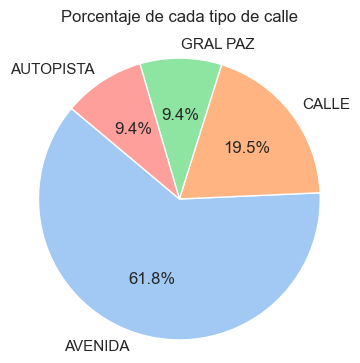

In [28]:
# Visualización de tipo de calle donde ocurrieron los hechos

tipo_de_calle_counts = hom_hech_df['TIPO DE CALLE'].value_counts()

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el diagrama de torta usando matplotlib
plt.figure(figsize=(4, 4))
plt.pie(tipo_de_calle_counts, 
        labels=tipo_de_calle_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("pastel"),
        labeldistance=1.1)  # Mover etiquetas hacia afuera

# Título del gráfico con ajuste de posición
plt.title('Porcentaje de cada tipo de calle', y=1.05)

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

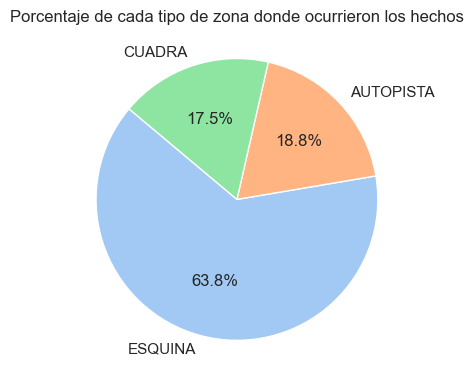

In [29]:
# Visualización de tipo de zona donde ocurrieron los hechos

tipo_de_calle_counts = hom_hech_df['TIPO DE ZONA'].value_counts()

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el diagrama de torta usando matplotlib
plt.figure(figsize=(4, 4))
plt.pie(tipo_de_calle_counts, 
        labels=tipo_de_calle_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("pastel"),
        labeldistance=1.1)  # Mover etiquetas hacia afuera

# Título del gráfico con ajuste de posición
plt.title('Porcentaje de cada tipo de zona donde ocurrieron los hechos', y=1.05)

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

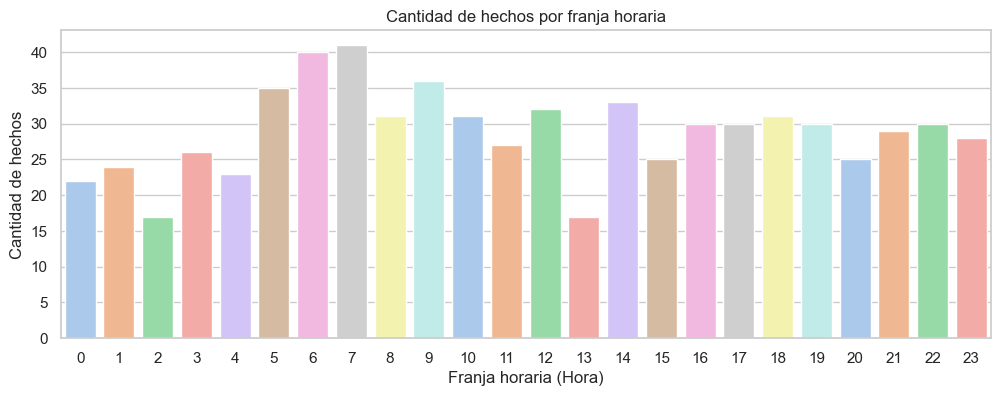

In [30]:
# Visualización de franja horaria en la que ocurrieron los hechos

hom_hech_df_filtered = hom_hech_df[hom_hech_df['FRANJA HORARIA'] != 'SD']

# Convertir la columna "HH" a tipo numérico si es necesario
hom_hech_df_filtered['FRANJA HORARIA'] = pd.to_numeric(hom_hech_df_filtered['FRANJA HORARIA'])

# Cuenta la cantidad de filas para cada franja horaria en la columna "HH"
franjas_horarias_counts = hom_hech_df_filtered['FRANJA HORARIA'].value_counts().sort_index()

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 4))
sns.barplot(x=franjas_horarias_counts.index, y=franjas_horarias_counts.values, palette='pastel')

# Título del gráfico y etiquetas de los ejes
plt.title('Cantidad de hechos por franja horaria')
plt.xlabel('Franja horaria (Hora)')
plt.ylabel('Cantidad de hechos')

# Mostrar el gráfico
plt.show()

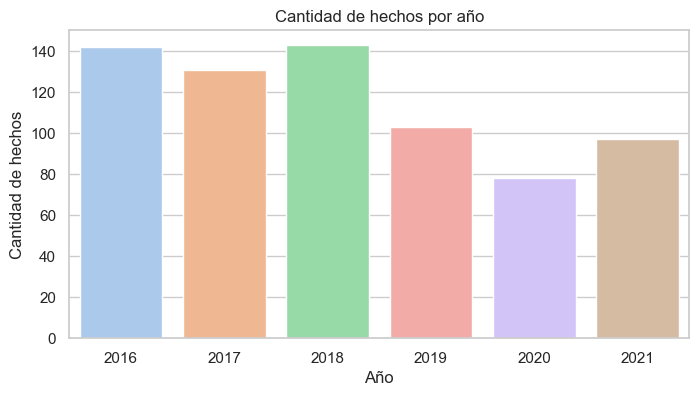

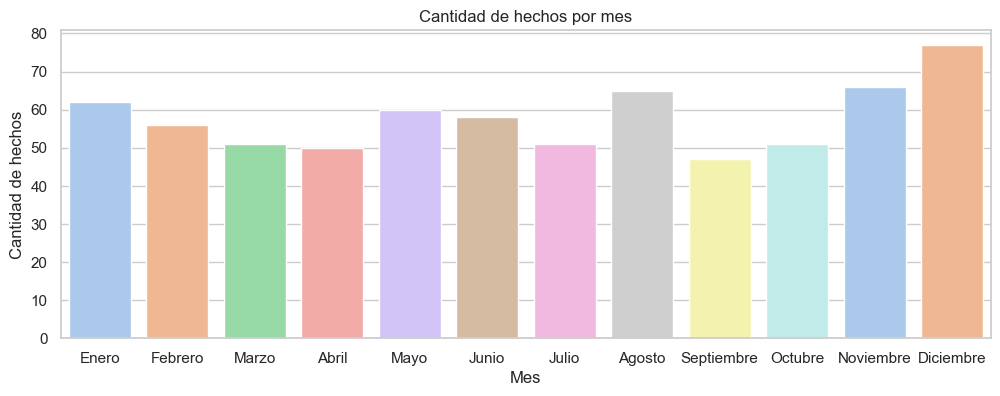

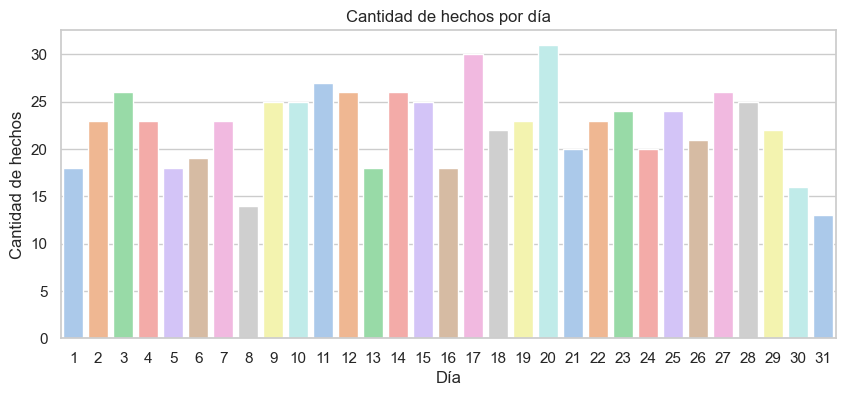

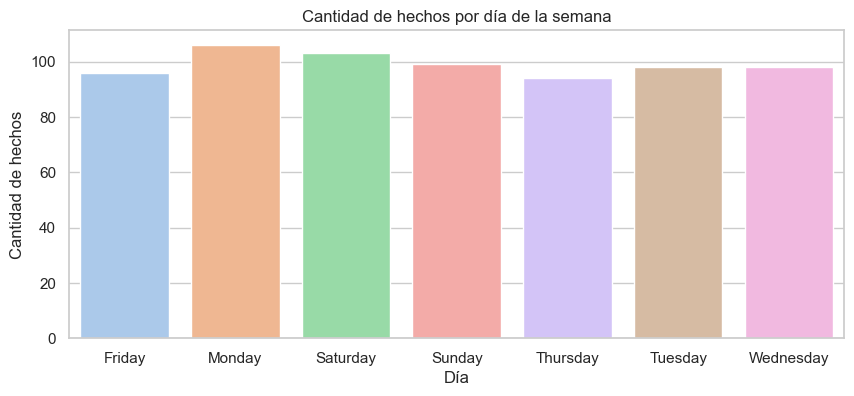

In [31]:
# Visualización de ocurrencia de hechos por año

hom_hech_df = hom_hech_df.dropna(subset=['FECHA'])

# Extraer año, mes y día de la columna "FECHA"
hom_hech_df['AÑO'] = hom_hech_df['FECHA'].dt.year
hom_hech_df['MES'] = hom_hech_df['FECHA'].dt.month
hom_hech_df['DÍA'] = hom_hech_df['FECHA'].dt.day

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Gráfico de barras por año
plt.figure(figsize=(8, 4))
años_counts = hom_hech_df['AÑO'].value_counts().sort_index()
sns.barplot(x=años_counts.index, y=años_counts.values, palette='pastel')
plt.title('Cantidad de hechos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de hechos')
plt.show()

# Gráfico de barras por mes
plt.figure(figsize=(12, 4))
meses_counts = hom_hech_df['MES'].value_counts().sort_index()
sns.barplot(x=meses_counts.index, y=meses_counts.values, palette='pastel')
plt.title('Cantidad de hechos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de hechos')
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.show()

# Gráfico de barras por día
plt.figure(figsize=(10, 4))
días_counts = hom_hech_df['DÍA'].value_counts().sort_index()
sns.barplot(x=días_counts.index, y=días_counts.values, palette='pastel')
plt.title('Cantidad de hechos por día')
plt.xlabel('Día')
plt.ylabel('Cantidad de hechos')
plt.show()

# Gráfico de barras por día
plt.figure(figsize=(10, 4))
días_counts = hom_hech_df['DIA DE LA SEMANA'].value_counts().sort_index()
sns.barplot(x=días_counts.index, y=días_counts.values, palette='pastel')
plt.title('Cantidad de hechos por día de la semana')
plt.xlabel('Día')
plt.ylabel('Cantidad de hechos')
plt.show()


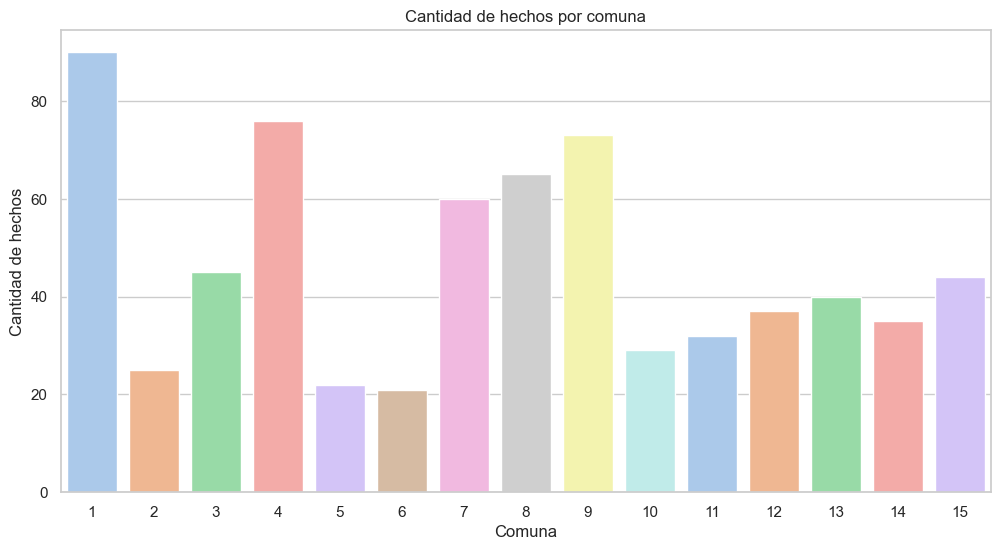

In [32]:
# Visualización de ocurrencia de hechos por comuna

comunas_counts = hom_hech_df['COMUNA'].value_counts().sort_index()

# Configuración del estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=comunas_counts.index, y=comunas_counts.values, palette='pastel')

# Título del gráfico y etiquetas de los ejes
plt.title('Cantidad de hechos por comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de hechos')

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
#plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

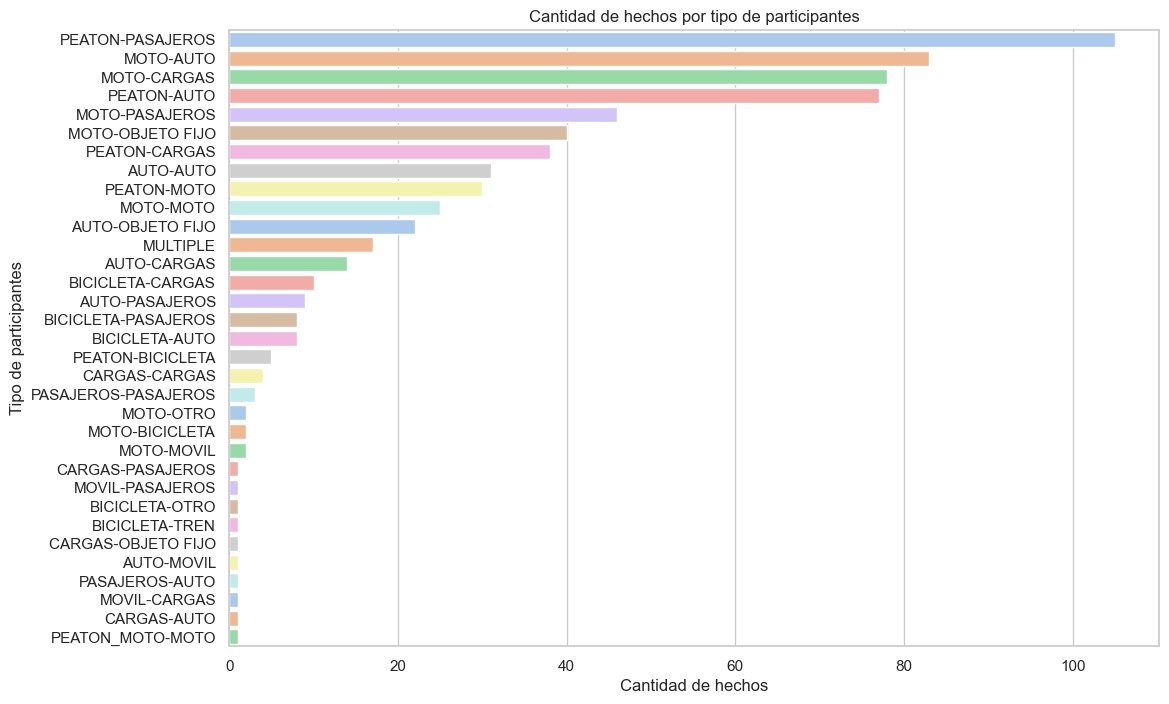

In [33]:
# Visualización de tipos de participantes en los hechos

# Filtrar el DataFrame para excluir los tipos de participantes que contienen "SD" en su nombre
hom_hech_df_filtered = hom_hech_df[~hom_hech_df['PARTICIPANTES'].str.contains('SD')]

# Contar la cantidad de hechos para cada tipo de participantes después de filtrar
participantes_counts = hom_hech_df_filtered['PARTICIPANTES'].value_counts().sort_values(ascending=False)

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(x=participantes_counts.values, y=participantes_counts.index, palette='pastel')

# Título del gráfico y etiquetas de los ejes
plt.title('Cantidad de hechos por tipo de participantes')
plt.xlabel('Cantidad de hechos')
plt.ylabel('Tipo de participantes')

# Mostrar el gráfico
plt.show()

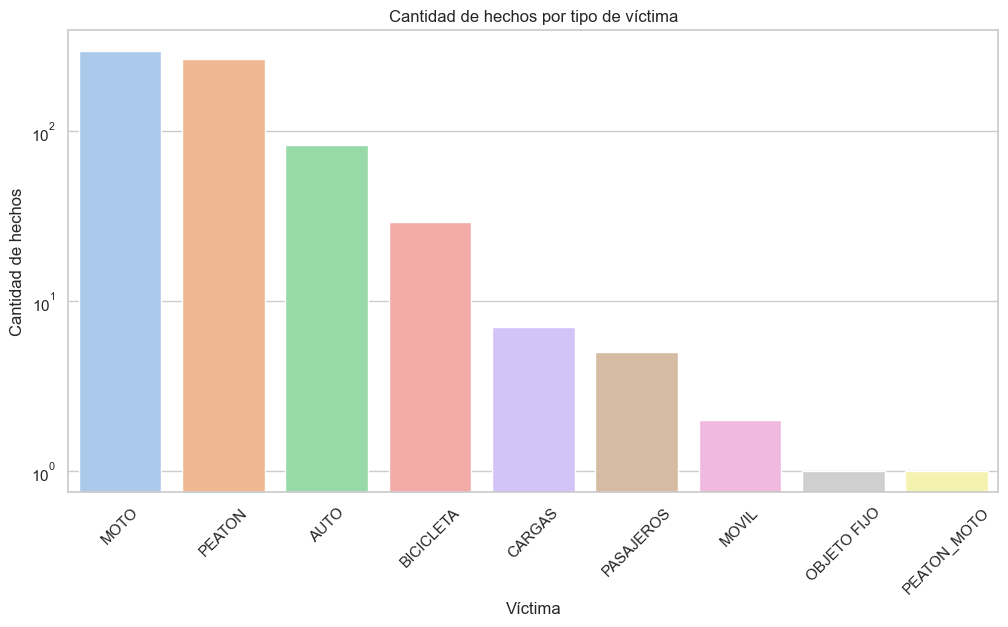

In [34]:
# Visualización de víctimas en los hechos

# Eliminar la categoría "SD" del DataFrame
hom_hech_df_filtered = hom_hech_df[hom_hech_df['VICTIMA'] != 'SD']

# Contar la cantidad de filas para cada valor en la columna "VICTIMA"
victima_counts = hom_hech_df_filtered['VICTIMA'].value_counts()

# Ordenar las ocurrencias de mayor a menor
victima_counts = victima_counts.sort_values(ascending=False)

# Configuración del estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras con el eje y en escala logarítmica
plt.figure(figsize=(12, 6))
sns.barplot(x=victima_counts.index, y=victima_counts.values, palette='pastel')

# Título del gráfico y etiquetas de los ejes
plt.title('Cantidad de hechos por tipo de víctima')
plt.xlabel('Víctima')
plt.ylabel('Cantidad de hechos')
plt.yscale('log')  # Escala logarítmica en el eje y

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

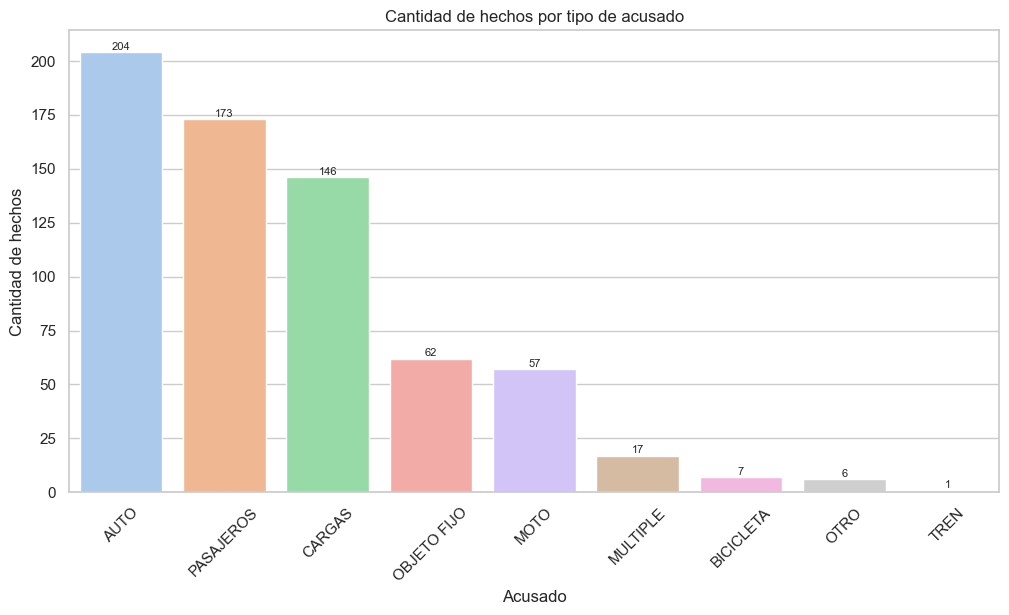

In [35]:
# Filtrar el DataFrame para excluir la categoría "SD"
hom_hech_df_filtered = hom_hech_df[hom_hech_df['ACUSADO'] != 'SD']

# Contar la cantidad de filas para cada valor en la columna "ACUSADO" y ordenar de mayor a menor
acusado_counts = hom_hech_df_filtered['ACUSADO'].value_counts().sort_values(ascending=False)

# Configuración del estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras vertical
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=acusado_counts.index, y=acusado_counts.values, palette='pastel')

# Anotaciones sobre las barras
for index, value in enumerate(acusado_counts.values):
    barplot.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)

# Título del gráfico y etiquetas de los ejes
plt.title('Cantidad de hechos por tipo de acusado')
plt.xlabel('Acusado')
plt.ylabel('Cantidad de hechos')

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

### 5. EDA y limpieza de hom_vic_df

In [36]:
# Explorar filas y columnas

print('Cantidad de Filas y columnas:',hom_vic_df.shape)
print('Nombre columnas:',hom_vic_df.columns)

Cantidad de Filas y columnas: (717, 10)
Nombre columnas: Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')


In [37]:
# Exploro datos faltantes

hom_vic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


In [38]:
# Verificar si hay duplicados en el DataFrame
duplicados = hom_vic_df.duplicated()

# Contar el número de registros duplicados
print(f"Número de registros duplicados: {duplicados.sum()}")


Número de registros duplicados: 0


In [39]:
# Convertir las columnas FECHA a formato datetime especificando el formato correcto

hom_vic_df['FECHA'] = pd.to_datetime(hom_vic_df['FECHA'], format='%m/%d/%Y', errors='coerce')

print(hom_vic_df['FECHA'].isna().sum())

0


In [40]:
display(hom_vic_df)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,12/12/2021
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,1/2/2022


In [41]:
print(hom_vic_df["ROL"].unique())
print(hom_vic_df["VICTIMA"].unique())
print(hom_vic_df["SEXO"].unique())
print(hom_vic_df["EDAD"].unique())

['CONDUCTOR' 'PASAJERO_ACOMPAÑANTE' 'PEATON' 'SD' 'CICLISTA']
['MOTO' 'AUTO' 'PEATON' 'SD' 'CARGAS' 'BICICLETA' 'PASAJEROS' 'MOVIL']
['MASCULINO' 'FEMENINO' 'SD']
['19' '70' '30' '18' '29' '22' '16' '59' '65' '34' '41' '50' '38' '21'
 '52' '36' '20' '54' 'SD' '56' '24' '78' '79' '26' '57' '37' '58' '23'
 '60' '42' '53' '51' '40' '87' '76' '75' '35' '80' '43' '45' '67' '27'
 '55' '49' '81' '25' '33' '46' '83' '39' '28' '7' '48' '4' '82' '32' '17'
 '47' '61' '10' '95' '73' '84' '66' '85' '1' '15' '13' '77' '44' '31' '62'
 '74' '71' '11' '86' '69' '72' '12' '63' '92' '68' '91' '64' '5' '88']


In [42]:
hom_vic_df.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [43]:
hom_vic_df = hom_vic_df[['ID_hecho', 'FECHA', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD']]

In [44]:
hom_vic_df = hom_vic_df.rename(columns={'ID_hecho': 'ID'})

In [45]:
hom_vic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ID       717 non-null    object        
 1   FECHA    717 non-null    datetime64[ns]
 2   ROL      717 non-null    object        
 3   VICTIMA  717 non-null    object        
 4   SEXO     717 non-null    object        
 5   EDAD     717 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 33.7+ KB


In [46]:
# Reemplazar 'SD' con NaN en las columnas EDAD
hom_vic_df['EDAD'].replace('SD', np.nan, inplace=True)
hom_vic_df['EDAD'] = hom_vic_df['EDAD'].astype(float).astype('Int32')

hom_vic_df['SEXO'].replace('SD', np.nan, inplace=True)
hom_vic_df['VICTIMA'].replace('SD', np.nan, inplace=True)
hom_vic_df['ROL'].replace('SD', np.nan, inplace=True)

### 6. Visualización de datos de archivo de víctimas

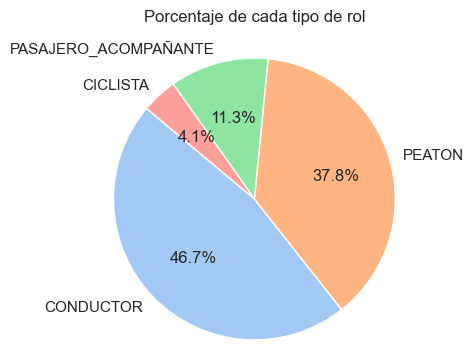

In [47]:
# Visualización del tipo de rol de las víctimas

# Eliminar la categoría "SD" del DataFrame
hom_vic_df_copia = hom_vic_df[hom_vic_df['ROL'] != 'SD']
tipo_de_calle_counts = hom_vic_df_copia['ROL'].value_counts()

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el diagrama de torta usando matplotlib
plt.figure(figsize=(4, 4))
plt.pie(tipo_de_calle_counts, 
        labels=tipo_de_calle_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("pastel"),
        labeldistance=1.1)  # Mover etiquetas hacia afuera

# Título del gráfico con ajuste de posición
plt.title('Porcentaje de cada tipo de rol', y=1.05)

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

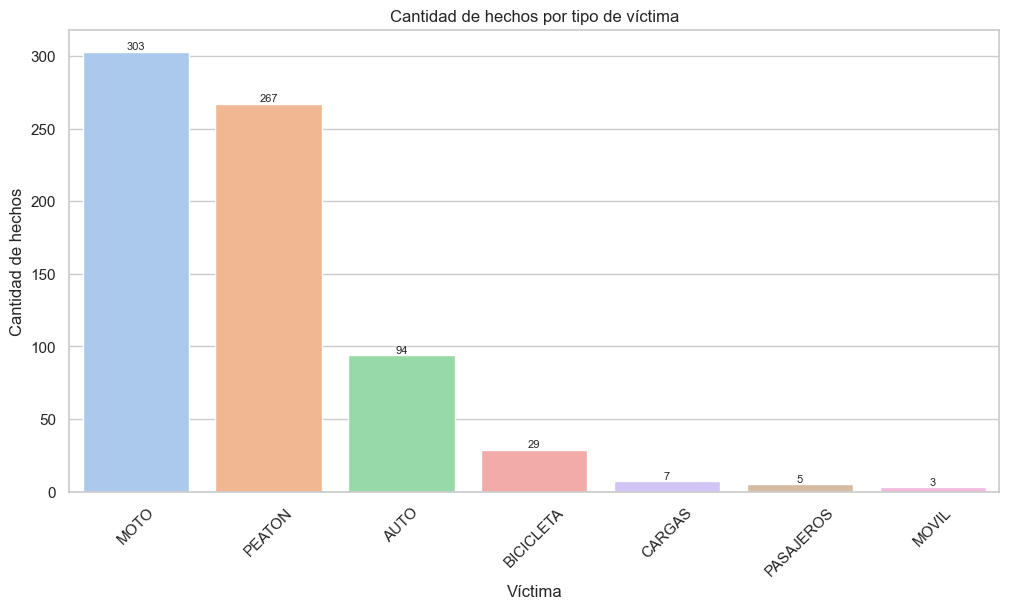

In [48]:
# Visualización del tipo de víctima de los hechos

# Eliminar la categoría "SD" del DataFrame
hom_vic_df_copia = hom_vic_df[hom_vic_df['VICTIMA'] != 'SD']
tipo_de_calle_counts = hom_vic_df_copia['VICTIMA'].value_counts().sort_values(ascending=False)


# Configuración del estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras vertical
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=tipo_de_calle_counts.index, y=tipo_de_calle_counts.values, palette='pastel')

# Anotaciones sobre las barras
for index, value in enumerate(tipo_de_calle_counts.values):
    barplot.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)

# Título del gráfico y etiquetas de los ejes
plt.title('Cantidad de hechos por tipo de víctima')
plt.xlabel('Víctima')
plt.ylabel('Cantidad de hechos')

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

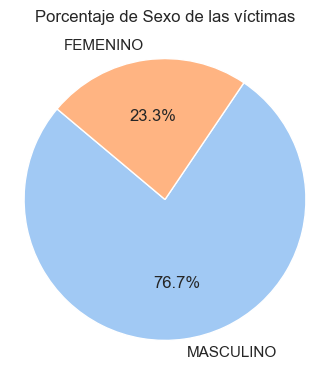

In [49]:
# Visualización del tipo de rol de las víctimas

# Eliminar la categoría "SD" del DataFrame
hom_vic_df_copia = hom_vic_df[hom_vic_df['SEXO'] != 'SD']
tipo_de_calle_counts = hom_vic_df_copia['SEXO'].value_counts()

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el diagrama de torta usando matplotlib
plt.figure(figsize=(4, 4))
plt.pie(tipo_de_calle_counts, 
        labels=tipo_de_calle_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("pastel"),
        labeldistance=1.1)  # Mover etiquetas hacia afuera

# Título del gráfico con ajuste de posición
plt.title('Porcentaje de Sexo de las víctimas', y=1.05)

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

### 7. Guardar archivos

In [51]:
# GUARDAR DFS

# Exportamos el DataFrame a un archivo CSV
hom_hech_df.to_csv('df_hechos.csv', index=False)
hom_vic_df.to_csv('df_victimas.csv', index=False)